<a href="https://www.kaggle.com/code/muhiburr/sleep-health-analysis?scriptVersionId=246369968" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sleep Health Analysis

**Firstly let's understand this dataset through the use of in-built pandas function.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For notebook styling
sns.set(style="whitegrid")

df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [2]:
missing_values_after_drop_sleep = df.isnull().sum()
missing_values_after_drop_sleep

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [3]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [4]:
summary_stats_sleep = df.describe()
summary_stats_sleep

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


## Explaratory Data Analysis

Using this sleep and health dataset, I will perform EDA (Explaratory Data Analysis) and my main objectives are as follows:
1. Is there a pattern between BMI and sleep disorders?
2. Does age or gender affect sleep duration?
3. Which occupations tend to have poorer sleep?
4. Are daily steps associated with better sleep quality?
5. Which occupation group has the highest rate of sleep disorders?

### 1. Is there a pattern between BMI and sleep disorders?

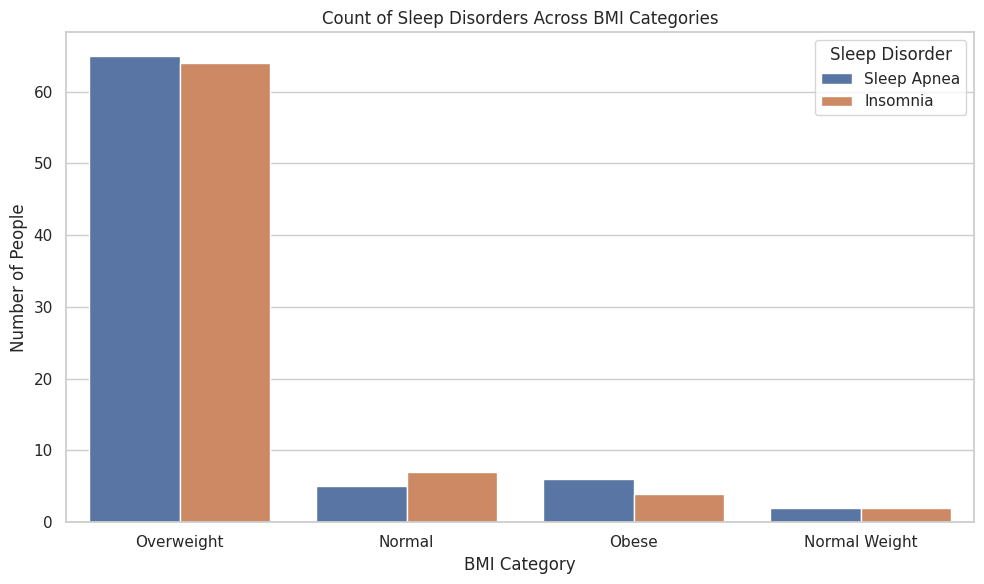

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder')
plt.title('Count of Sleep Disorders Across BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Number of People')
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()


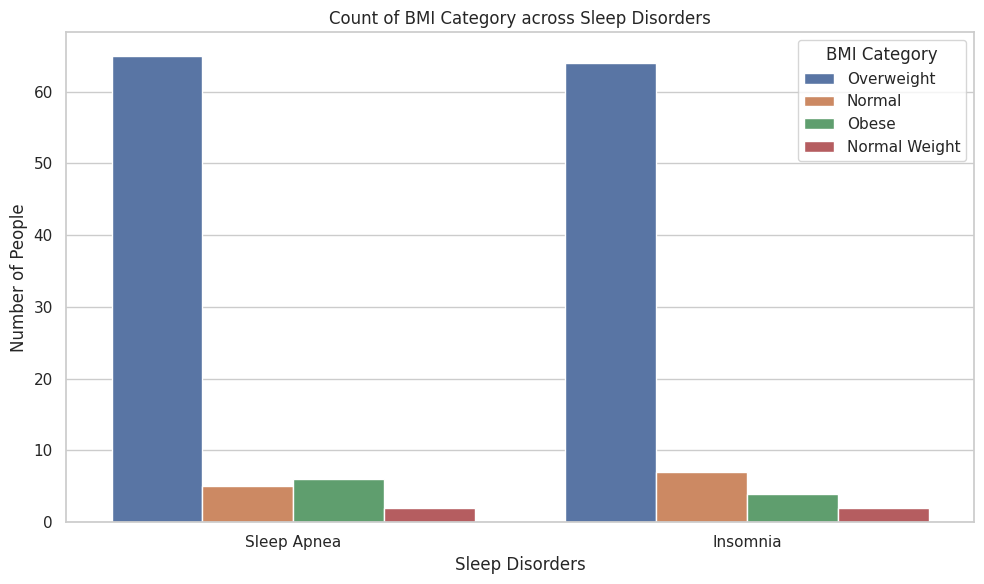

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Sleep Disorder', hue="BMI Category")
plt.title("Count of BMI Category across Sleep Disorders")
plt.xlabel('Sleep Disorders')
plt.ylabel('Number of People')
plt.legend(title='BMI Category')
plt.tight_layout()
plt.show()


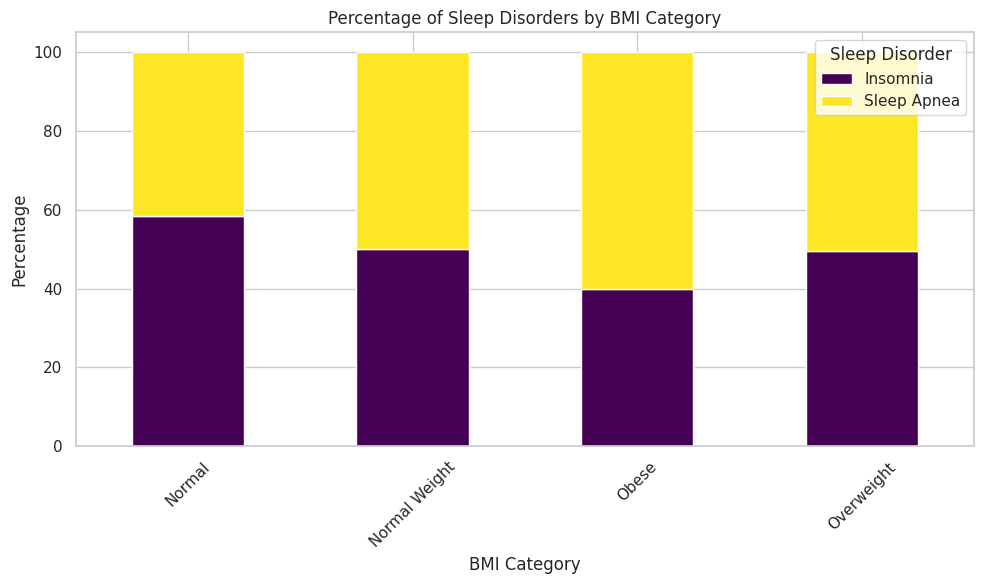

In [7]:
import pandas as pd

# Create a crosstab of BMI vs Sleep Disorder
bmi_sleep_ct = pd.crosstab(df['BMI Category'], df['Sleep Disorder'], normalize='index') * 100

# Plot the percentages
bmi_sleep_ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Percentage of Sleep Disorders by BMI Category')
plt.ylabel('Percentage')
plt.xlabel('BMI Category')
plt.legend(title='Sleep Disorder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. Does age or gender affect sleep duration?

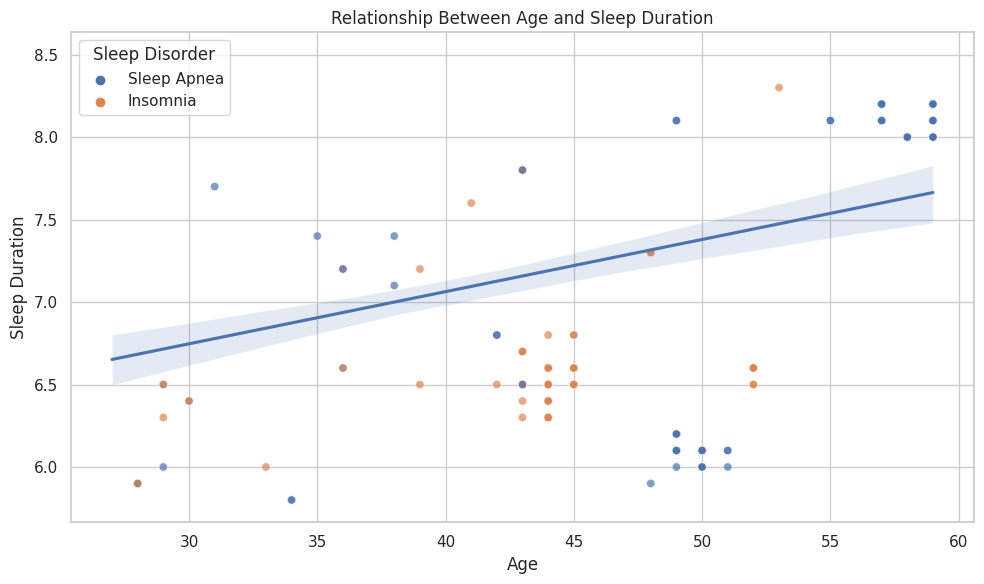

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Sleep Duration', hue='Sleep Disorder', alpha=0.7)
sns.regplot(data=df, x='Age', y='Sleep Duration', scatter_kws={'alpha':0})

plt.title('Relationship Between Age and Sleep Duration')
plt.tight_layout()
plt.show()


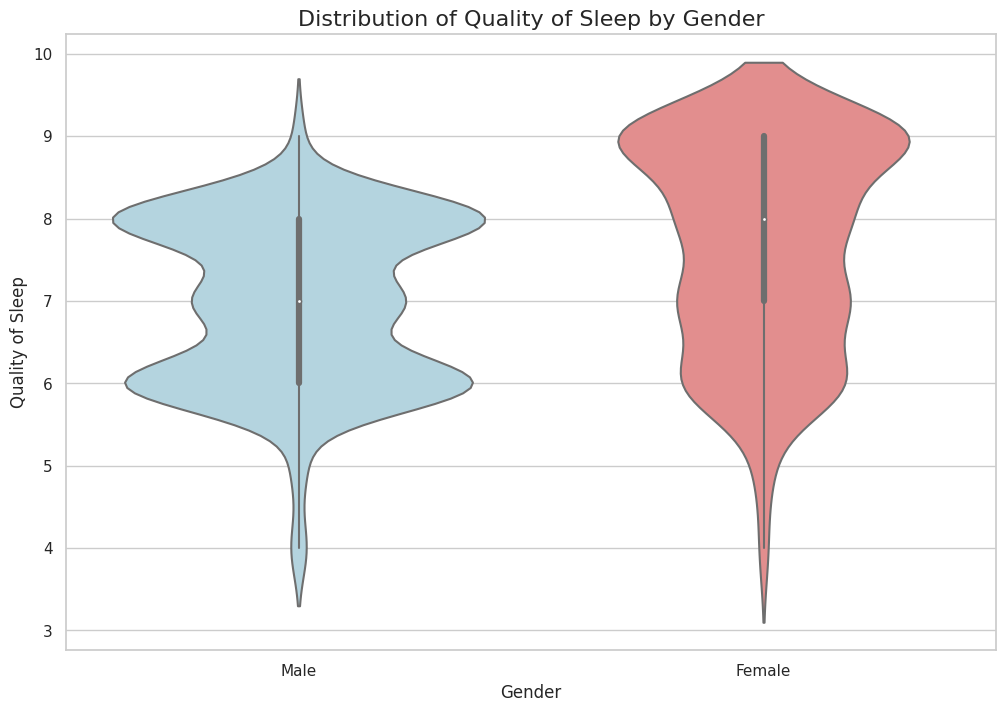

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

color_palette = {'Male': 'lightblue', 'Female': 'lightcoral'}
plt.figure(figsize=(12, 8))
sns.violinplot(x='Gender', y='Quality of Sleep', data=df, palette=color_palette)
plt.title('Distribution of Quality of Sleep by Gender', fontsize=16)
plt.show()

### 3. Which occupations tend to have poorer sleep?

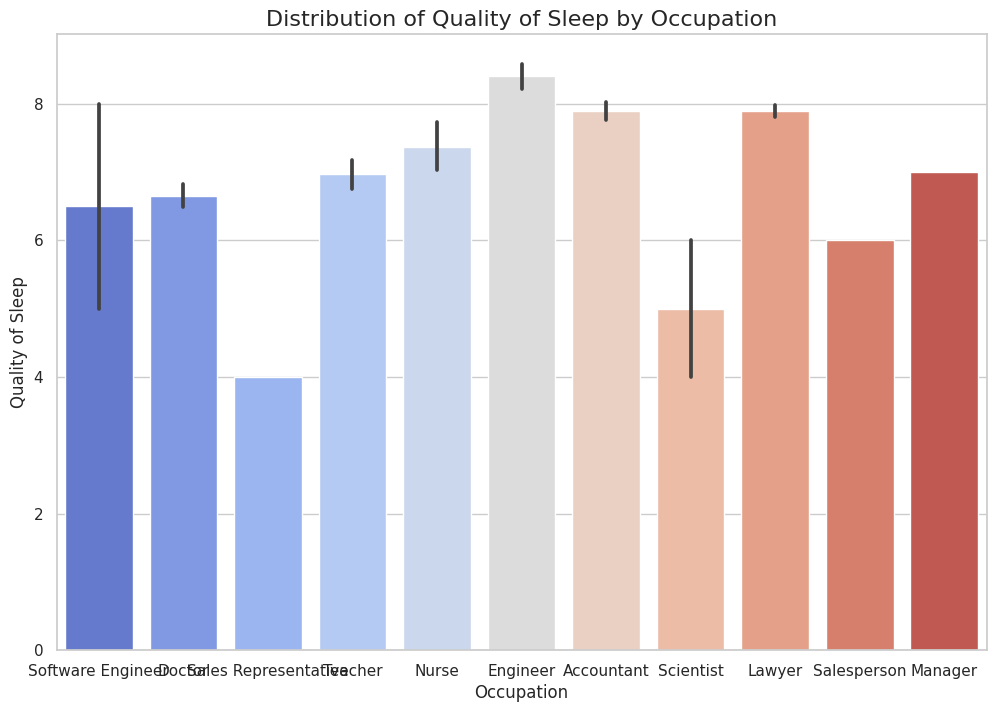

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation', y='Quality of Sleep', data=df, palette='coolwarm')
plt.title('Distribution of Quality of Sleep by Occupation', fontsize=16)
plt.show()

In [11]:
summary = df.groupby('Occupation').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Sleep Disorder': lambda x: (x != 'None').mean() * 100  # % with a disorder
})

summary = summary.sort_values(by='Quality of Sleep', ascending=[False])
print(summary)

                      Sleep Duration  Quality of Sleep  Sleep Disorder
Occupation                                                            
Engineer                    7.987302          8.412698           100.0
Lawyer                      7.410638          7.893617           100.0
Accountant                  7.113514          7.891892           100.0
Nurse                       7.063014          7.369863           100.0
Manager                     6.900000          7.000000           100.0
Teacher                     6.690000          6.975000           100.0
Doctor                      6.970423          6.647887           100.0
Software Engineer           6.750000          6.500000           100.0
Salesperson                 6.403125          6.000000           100.0
Scientist                   6.000000          5.000000           100.0
Sales Representative        5.900000          4.000000           100.0


## Building a Predictive Model

We are now moving from exploratory data analysis (EDA) to predictive modeling and SUPERVISED LEARNING — where we will use the dataset to predict the likelihood of a person having a **sleep disorder** based on their lifestyle and health data.

### Classification

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

        None       0.72      0.81      0.76        16
    Insomnia       0.85      0.69      0.76        16
 Sleep Apnea       0.95      0.98      0.97        43

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



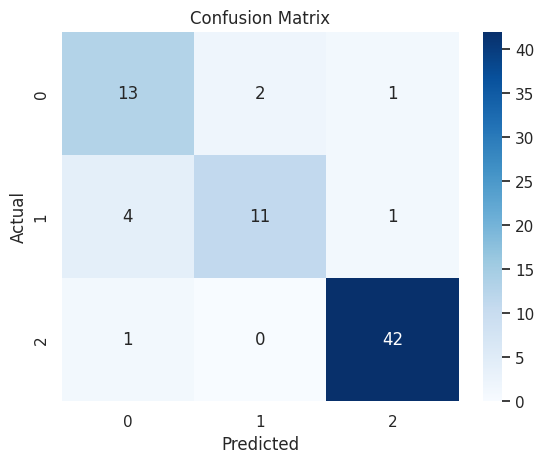

In [12]:
# Target variable: what you're predicting
target = 'Sleep Disorder'

# Features: factors you’ll use to predict sleep disorder
features = [
    'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'Stress Level',
    'BMI Category', 'Heart Rate', 'Daily Steps'
]

from sklearn.preprocessing import LabelEncoder

# Copy the data
model_df = df[features + [target]].copy()

# Apply label encoding to categorical columns
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col])
    label_encoders[col] = le  # Save encoders to decode later if needed

from sklearn.model_selection import train_test_split

X = model_df.drop(columns=target)
y = model_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
class_names = ['None', 'Insomnia', 'Sleep Apnea']

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Optional: visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues", fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
